# Name: Apoorva Sharma
# Roll No: 2301560047
# Program: MCA
# Assignment Type: Linear Regression

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [2]:
data = pd.read_csv("Life Expectancy Data.csv")

In [3]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
data.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2431,Spain,2009,Developed,81.6,66.0,2,9.99,5047.254058,96.0,41,...,96.0,9.52,96.0,0.1,32333.466100,46362946.0,0.6,0.5,0.858,16.3
2555,Tajikistan,2013,Developing,69.3,163.0,10,0.01,1.041916,96.0,1,...,97.0,6.75,96.0,0.2,14.214412,817789.0,3.6,3.7,0.617,11.2
1858,New Zealand,2002,Developed,78.7,83.0,0,9.13,2892.257132,89.0,21,...,84.0,7.89,9.0,0.1,16874.312320,NaN,0.3,0.3,0.873,17.5
86,Argentina,2009,Developing,75.6,126.0,10,8.33,1398.042623,94.0,3,...,97.0,7.63,94.0,0.1,8161.369660,479947.0,1.0,0.9,0.794,16.5
2839,Uzbekistan,2002,Developing,67.1,186.0,27,1.47,24.994387,62.0,25,...,99.0,5.44,99.0,0.2,383.349500,2527185.0,3.3,3.3,0.600,11.0
1867,Nicaragua,2009,Developing,73.2,163.0,3,3.36,292.753101,98.0,0,...,99.0,6.82,98.0,0.2,1464.497754,5666581.0,1.9,1.8,0.613,11.3
1990,Papua New Guinea,2000,Developing,58.9,335.0,11,0.73,62.562738,57.0,7135,...,51.0,3.98,59.0,1.1,631.946853,5572222.0,1.6,1.5,0.418,6.2
2466,Sudan,2006,Developing,61.0,26.0,66,1.90,60.336857,6.0,228,...,77.0,3.93,78.0,0.2,893.879364,316764.0,NaN,NaN,0.430,6.2
571,China,2004,Developing,73.5,11.0,360,3.04,1.586685,79.0,70549,...,87.0,4.72,87.0,0.1,158.668462,129675.0,5.1,4.6,0.622,10.2
1251,Ireland,2014,Developed,81.2,66.0,0,10.75,746.367045,95.0,33,...,96.0,7.78,96.0,0.1,5553.326230,4617225.0,0.3,0.2,0.910,18.6


In [8]:
# Correcting column names
column = data.columns.to_list()
column

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [9]:
data.columns = [a.strip() for a in column]

In [10]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
# Taking care of missing data
missing_data = pd.DataFrame(data.isnull().sum(), columns = ['missing'])
missing_data


,missing
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")

In [13]:
data['Life expectancy'] = imputer.fit_transform(data[['Life expectancy']])
data['Adult Mortality'] = imputer.fit_transform(data[['Adult Mortality']])
data['Alcohol'] = imputer.fit_transform(data[['Alcohol']])
data['Hepatitis B'] = imputer.fit_transform(data[['Hepatitis B']])
data['BMI'] = imputer.fit_transform(data[['BMI']])
data['Polio'] = imputer.fit_transform(data[['Polio']])
data['Total expenditure'] = imputer.fit_transform(data[['Total expenditure']])
data['Diphtheria'] = imputer.fit_transform(data[['Diphtheria']])
data['GDP'] = imputer.fit_transform(data[['GDP']])
data['Population'] = imputer.fit_transform(data[['Population']])
data['thinness  1-19 years'] = imputer.fit_transform(data[['thinness  1-19 years']])
data['thinness 5-9 years'] = imputer.fit_transform(data[['thinness 5-9 years']])
data['Income composition of resources'] = imputer.fit_transform(data[['Income composition of resources']])
data['Schooling'] = imputer.fit_transform(data[['Schooling']])

In [14]:
missing_data = pd.DataFrame(data.isnull().sum(), columns = ['missing'])
missing_data

,missing
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [15]:
# Encoding of dependent variables
data.select_dtypes(exclude=["number","bool_"]).sample(5)

,Country,Status
253,Belgium,Developed
2582,Thailand,Developing
1624,Mali,Developing
780,Dominican Republic,Developing
104,Armenia,Developing


In [16]:
print('Unique:\n\nCountry: {}\nStatus: {}'.format(len(data['Country'].unique()), len(data['Status'].unique())))

Unique:

Country: 193
Status: 2


In [17]:
country_dummy = pd.get_dummies(data['Country'], drop_first = True)
status_dummy = pd.get_dummies(data['Status'], drop_first = True)

In [18]:
data.drop(['Country', 'Status'], inplace = True, axis = 1)

In [19]:
corr_data = data.copy()

# Correlation matrix

In [20]:
correlation_matrix = corr_data.corr()

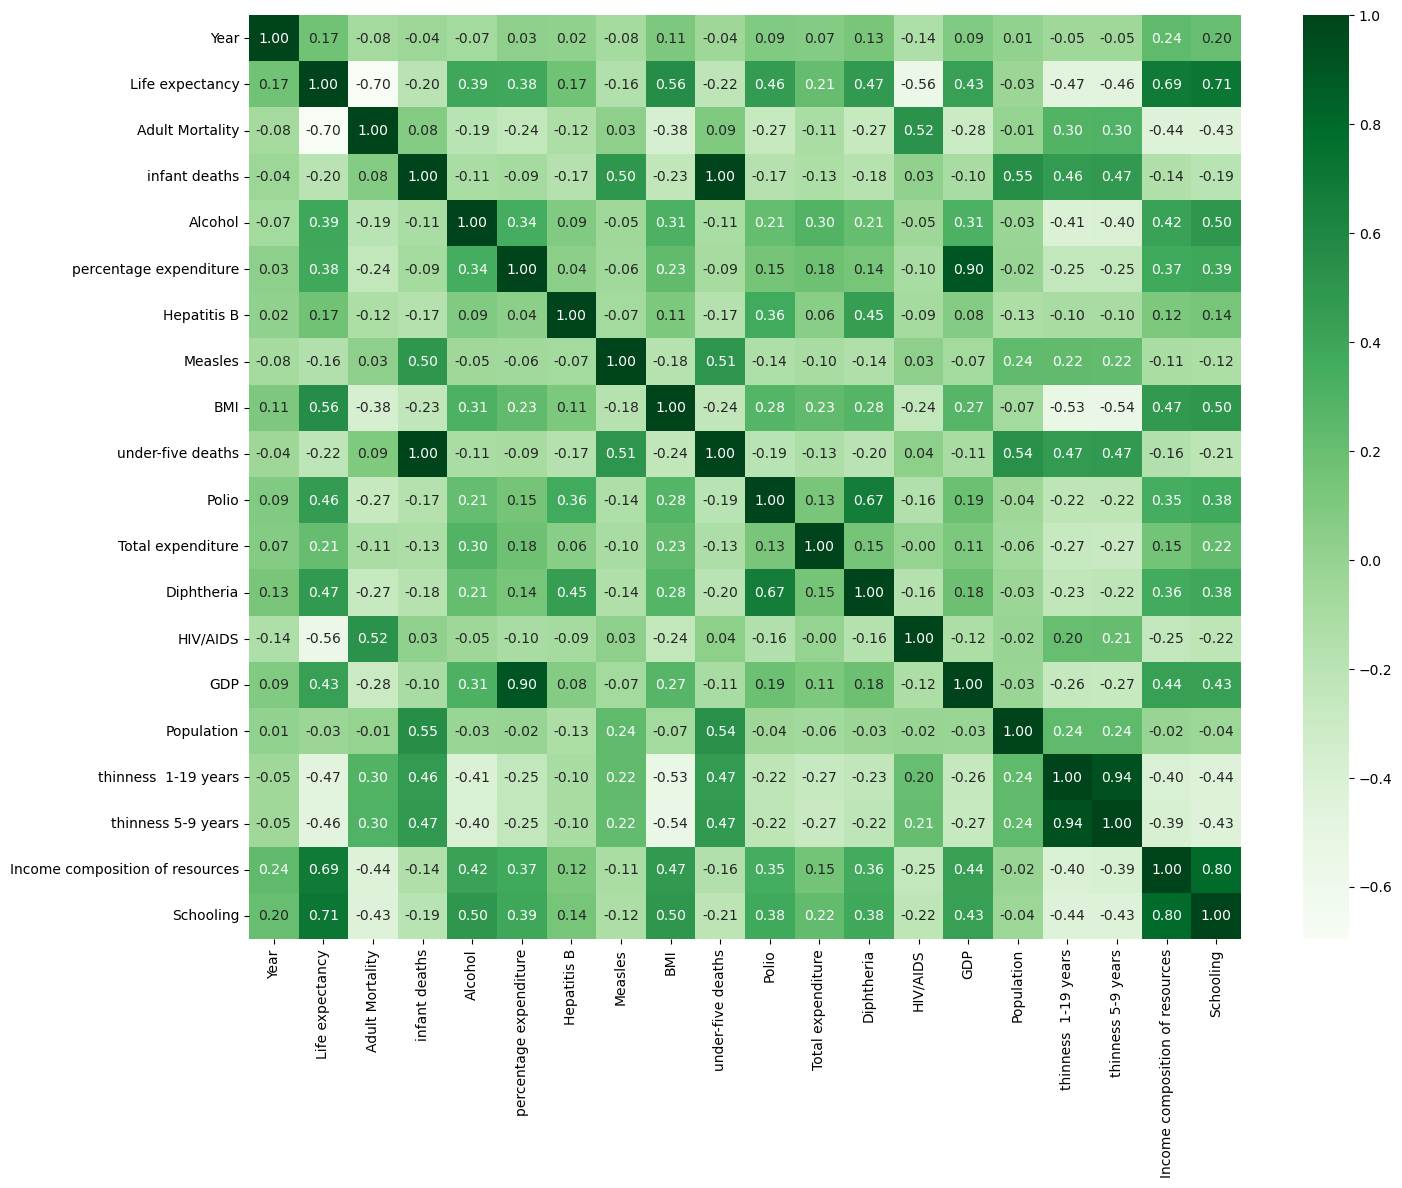

In [21]:
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap="Greens")
plt.show()


# Splitting the dataset into the Training set and Test set


In [23]:
Y = pd.DataFrame(data['Life expectancy'], columns = ['Life expectancy'])
Y.head()

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2


In [24]:
data.drop(['Life expectancy'], inplace = True, axis = 1)

In [25]:
all_data = pd.concat([data, country_dummy, status_dummy], axis = 1)
all_data.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
X_train, X_test, y_train, y_test = train_test_split(all_data, Y, test_size = 0.2, random_state = 0)

y_test.columns = ['y_test']

# Random Forest Regression model

In [27]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train.values.ravel())


RandomForestRegressor(n_estimators=10, random_state=0)

In [28]:
#Predicting the Test set results

y_pred = pd.DataFrame(regressor.predict(X_test), columns= ['y_pred'])

y_test.index = y_pred.index

random_forest_result = pd.concat([y_pred, y_test], axis = 1)
random_forest_result

,y_pred,y_test
0,77.19,77.3
1,66.81,66.6
2,52.46,52.6
3,60.64,61.5
4,56.32,60.0
...,...,...
583,81.85,81.3
584,51.37,53.2
585,73.14,72.6
586,76.42,73.0


In [29]:
# Evaluating the Model Performance

r2_random_forest = r2_score(y_test, y_pred)
r2_random_forest

0.9579024504916344

# Support Vector Regression (SVR) model

In [31]:
# Feature scaling

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train)

In [32]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_scaled, y_train_scaled.ravel())

SVR()

In [33]:
# Predicting the Test set results

y_pred = regressor.predict(sc_X.transform(X_test))
y_pred = pd.DataFrame(sc_y.inverse_transform(pd.DataFrame(y_pred)), columns= ['y_pred'])

y_test.index = y_pred.index

svr_result = pd.concat([y_pred, y_test], axis = 1)
svr_result

,y_pred,y_test
0,77.382378,77.3
1,66.353591,66.6
2,54.892583,52.6
3,62.014404,61.5
4,59.490456,60.0
...,...,...
583,82.128057,81.3
584,54.267497,53.2
585,72.096291,72.6
586,74.106817,73.0


In [34]:
# Evaluating the Model Performance

r2_svm = r2_score(y_test, y_pred)
r2_svm

0.9551772642247693

# Multiple Linear Regression model

In [35]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predicting the Test set results

y_pred = pd.DataFrame(regressor.predict(X_test), columns= ['y_pred'])

y_test.index = y_pred.index

random_forest_result = pd.concat([y_pred, y_test], axis = 1)
random_forest_result

,y_pred,y_test
0,77.798803,77.3
1,66.075743,66.6
2,57.411842,52.6
3,60.575904,61.5
4,58.655084,60.0
...,...,...
583,81.816123,81.3
584,53.863597,53.2
585,72.590105,72.6
586,74.195167,73.0


In [37]:
# Evaluating the Model Performance

r2_multiple_linear_regression = r2_score(y_test, y_pred)
r2_multiple_linear_regression

0.9526413011341472